In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Reading the data

In [2]:
data= pd.read_excel('Telco-Customer-Churn.xlsx')
data

C:\Users\Stevelal\anaconda3\lib\site-packages\openpyxl\worksheet\_reader.py:312: UserWarning: Unknown extension is not supported and will be removed
  warn(msg)


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0.0,Yes,No,1.0,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0.0,No,No,34.0,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0.0,No,No,2.0,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0.0,No,No,45.0,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0.0,No,No,2.0,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0.0,Yes,Yes,24.0,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.50,No
7039,2234-XADUH,Female,0.0,Yes,Yes,72.0,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.90,No
7040,4801-JZAZL,Female,0.0,Yes,Yes,11.0,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1.0,Yes,No,4.0,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.60,Yes


# 1 Compare churn count with respect to gender

In [3]:
data["Churn"].value_counts()

No     5174
Yes    1869
Name: Churn, dtype: int64

C:\Users\Stevelal\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


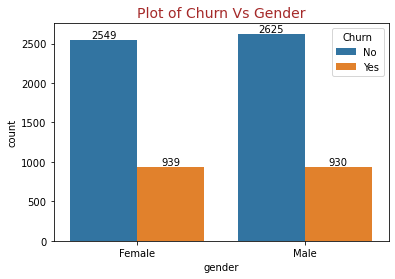

In [4]:
data_churn=sns.countplot(data["gender"],hue=data["Churn"])
plt.title("Plot of Churn Vs Gender",fontsize=14, color="Brown")
for i in data_churn.containers:
    data_churn.bar_label(i)
plt.show()

# Inference of Churn and Gender: 
Out of the total 7043 observations, 26.53 percent, i.e., 1869 had left the company. Out of which 930 are female and 939 are male. 

# 2. Find out how many female senior citizens there in the dataset

In [5]:
data['SeniorCitizen'].value_counts()

0.0    5901
1.0    1142
Name: SeniorCitizen, dtype: int64

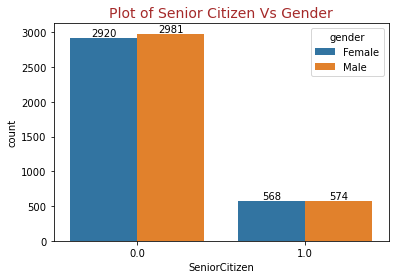

In [6]:
data_female_senior=sns.countplot(data=data,x="SeniorCitizen",hue="gender")
plt.title("Plot of Senior Citizen Vs Gender",fontsize=14, color="Brown")
for i in data_female_senior.containers:
    data_female_senior.bar_label(i)
plt.show()

# Inference on Female Senior Citizen: 
Out of the total 1142 senior citizens, 568 are female and 574 are male.

# 3. Compare 'tenure' with 'Total Charges'

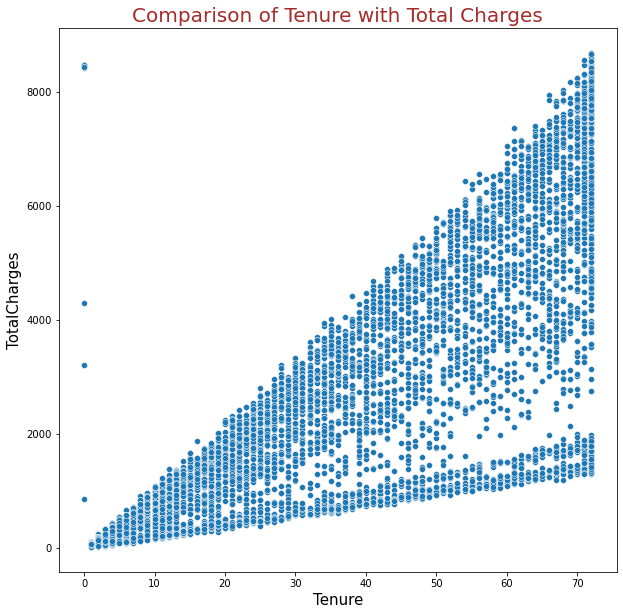

In [7]:
plt.figure(figsize=(10,10))
plt.title("Comparison of Tenure with Total Charges",fontsize=20, color='Brown')
sns.scatterplot(x="tenure", y="TotalCharges", data= data)
plt.ylabel("TotalCharges",fontsize=15)
plt.xlabel('Tenure', fontsize=15)
plt.show()

# Inference on Tenure and TotalCharges: 
The tenure and total charges are directly proportionate, i.e., as tenure increases total charges also increases. 

# 4. Find out which contract is preferred by the senior citizen.

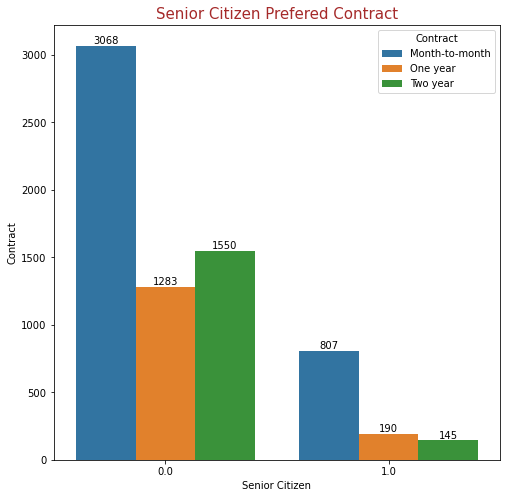

In [8]:
plt.figure(figsize=(8,8))
data_Contract= sns.countplot(x='SeniorCitizen',data=data ,hue="Contract")
plt.title('Senior Citizen Prefered Contract',size=15, color="Brown")
for i in data_Contract.containers:
    data_Contract.bar_label(i)
plt.xlabel('Senior Citizen')
plt.ylabel('Contract')
plt.show()

# Inference on contract prefered by senior citizen:
* Out of the total 1142 senior citizen, most of them prefer month-to-month contract, i.e., 807.
* Second preference is given to one year contract and third preference is given to two year contract. 
* Whereas in case of non-senior citizens, second preference goes to two year contract and third preference goes to one year contract. 

# 5. Comment on your finds on Payment Method?

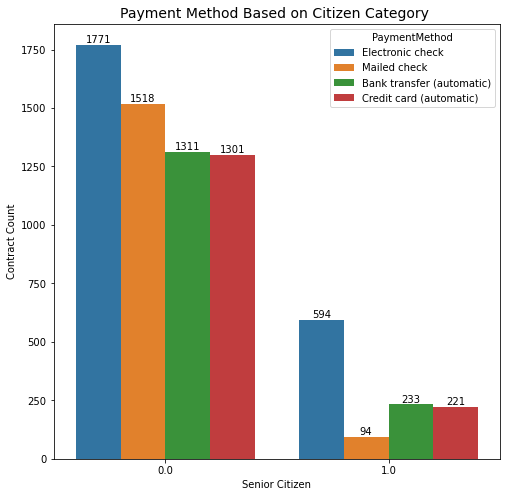

In [9]:
plt.figure(figsize=(8,8))
data_payment= sns.countplot(x='SeniorCitizen',data=data,hue="PaymentMethod")
plt.title('Payment Method Based on Citizen Category ',size=14)
for i in data_payment.containers:
    data_payment.bar_label(i)
plt.xlabel('Senior Citizen')
plt.ylabel('Contract Count')
plt.show()

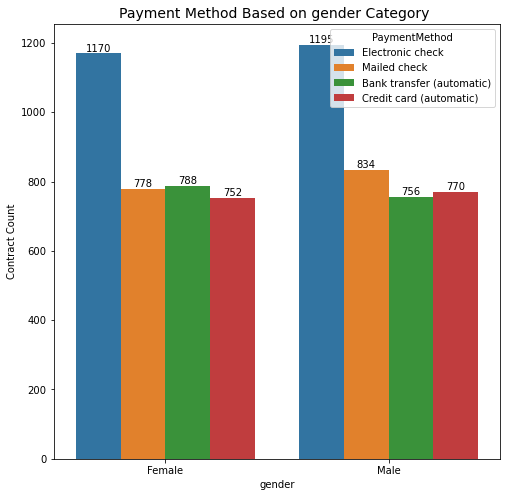

In [10]:
plt.figure(figsize=(8,8))
data_payment= sns.countplot(x='gender',data=data,hue="PaymentMethod")
plt.title('Payment Method Based on gender Category ',size=14)
for i in data_payment.containers:
    data_payment.bar_label(i)
plt.xlabel('gender')
plt.ylabel('Contract Count')
plt.show()

# Inference on payment methods:
* Electronic check is the most prefered method of payment amoung both gender and age categories.
* For senior citizen Mailed check is the least prefered, whereas for male and non-senior citizen category, it is the second most prefered method. 
* For female and senior citizen, Bank transfer is the second most prefered method of payment. 